In [193]:
import pandas as pd
import mnist
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

## Logistic Regression - MNIST

In [130]:
train_img = mnist.train_images()
train_lbl = mnist.train_labels()

test_img = mnist.test_images()
test_lbl = mnist.test_labels()

train_img = train_img.reshape((train_img.shape[0], train_img.shape[1] * train_img.shape[2]))

test_img = test_img.reshape((test_img.shape[0], test_img.shape[1] * test_img.shape[2]))



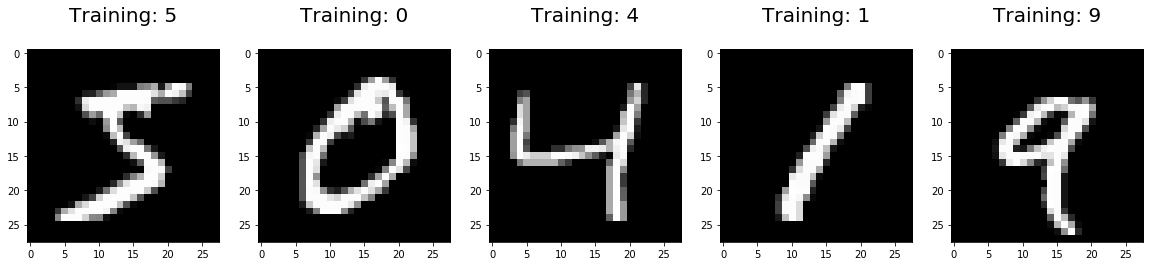

In [131]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [132]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [133]:
train_img.shape

(60000, 784)

In [134]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [135]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [136]:
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [137]:
predictions = logisticRegr.predict(test_img)

In [138]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9172


In [143]:
np.argsort(logisticRegr.coef_)

array([[249, 718, 717, ..., 370, 302, 498],
       [711, 716, 710, ...,  69, 612, 621],
       [709, 276, 368, ..., 390, 446, 474],
       ...,
       [129, 128, 619, ..., 339, 338, 310],
       [743, 501, 742, ..., 360, 691, 332],
       [162, 416, 444, ..., 721, 359, 720]])

## Logistic Regression - Spambase

In [144]:
train_img = pd.read_csv("../../data/spambase/spambase.data", header = None)
train_lbl = train_img.iloc[:,-1]
train_img = train_img.iloc[:,0:-1]

In [145]:
split = 0.7
split_length = len(train_img)

test_img  = np.array(train_img[int(split_length*split):])
train_img = np.array(train_img[:int(split_length*split)])

test_lbl  = np.array(train_lbl[int(split_length*split):])
train_lbl = np.array(train_lbl[:int(split_length*split)])

In [146]:
train_img

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [2.700e-01, 2.700e-01, 0.000e+00, ..., 1.231e+00, 6.000e+00,
        1.010e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.083e+00, 1.200e+01,
        3.700e+01],
       [0.000e+00, 0.000e+00, 8.700e-01, ..., 1.269e+00, 5.000e+00,
        3.300e+01]])

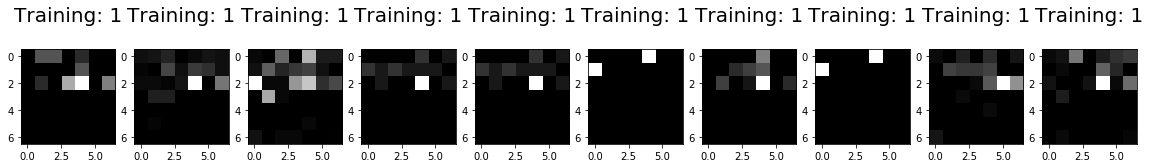

In [147]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:10], train_lbl[0:10])):
     
    plt.subplot(1, 10, index + 1)
    #print(image)
    plt.imshow(np.reshape(image[0:49], (7,7)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [148]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [149]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([0])

In [151]:
logisticRegr.predict(test_img[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
predictions = logisticRegr.predict(test_img)

In [153]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.8044895003620565


In [155]:
np.argsort(logisticRegr.coef_)

array([[24, 26, 25, 41, 44, 32, 28, 34, 36, 29, 43, 38, 40, 45, 30,  1,
        47, 42, 11, 27, 33, 31, 39, 35, 46, 49, 50,  0, 48, 37, 54, 13,
        56, 55, 20, 10,  8, 53, 14, 12, 18,  2,  3, 19,  9,  5, 17, 21,
        16, 52, 23,  4,  7, 22,  6, 15, 51]])

## Logistic Regression - 20 NG

In [210]:
news_train = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='train', 
                                remove=('headers', 'footers', 'quotes'))

news_test = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='test', 
                                remove=('headers', 'footers', 'quotes'))

In [219]:
vectorizer  = CountVectorizer(binary=True, stop_words='english')
train_img   = vectorizer.fit_transform(news_train.data)
test_img    = vectorizer.transform(news_test.data)
train_lbl   = news_train.target
test_lbl    = news_test.target


In [220]:
logisticRegr = LogisticRegression(solver = 'lbfgs', penalty='l2')

In [221]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
logisticRegr.predict(test_img[0:10])

array([ 4,  1,  8,  0,  0, 13,  8,  2,  5,  1])

In [223]:
predictions = logisticRegr.predict(train_img)

In [224]:
score = logisticRegr.score(train_img, train_lbl)
print(score)

0.9689764893052855


In [225]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.6411311736590547


In [267]:
logisticRegr.coef_

array([[-3.55364362e-01, -1.14479228e-01, -6.32424573e-04, ...,
        -5.33075878e-03, -1.26093206e-03, -1.26093206e-03],
       [ 1.06426532e-01,  2.11054148e-01, -1.83342875e-02, ...,
        -1.78280331e-03, -1.04973108e-02, -1.04973108e-02],
       [-4.04231118e-01,  4.85864586e-03, -1.34889186e-02, ...,
        -2.57787726e-04, -9.38443397e-04, -9.38443397e-04],
       ...,
       [-1.94389129e-01,  4.29984176e-01,  4.63298040e-03, ...,
        -2.03993130e-03, -8.02816235e-04, -8.02816235e-04],
       [ 1.33396406e-01,  6.28111333e-02, -2.86063757e-02, ...,
        -8.82292116e-04, -2.73141017e-03, -2.73141017e-03],
       [-3.68830817e-01,  1.44397873e-01, -1.51679892e-03, ...,
        -6.14944357e-03, -1.48795010e-04, -1.48795010e-04]])

## Decision Trees - MNIST

In [246]:
train_img = mnist.train_images()
train_lbl = mnist.train_labels()

test_img = mnist.test_images()
test_lbl = mnist.test_labels()

train_img = train_img.reshape((train_img.shape[0], train_img.shape[1] * train_img.shape[2]))

test_img = test_img.reshape((test_img.shape[0], test_img.shape[1] * test_img.shape[2]))


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_img, train_lbl)

In [247]:
predictions = clf.predict(test_img)

In [248]:
clf.score(train_img, train_lbl)

1.0

In [253]:
clf.score(test_img, test_lbl)

0.879

In [254]:
np.argsort(clf.feature_importances_)

array([  0, 477, 476, 475, 473, 451, 450, 449, 448, 478, 447, 423, 422,
       421, 420, 419, 418, 417, 395, 446, 394, 502, 505, 588, 587, 586,
       585, 584, 562, 560, 559, 504, 558, 534, 533, 532, 531, 530, 528,
       525, 508, 557, 589, 393, 782, 281, 280, 279, 278, 253, 252, 251,
       250, 282, 249, 225, 224, 223, 222, 198, 197, 196, 195, 226, 392,
       283, 305, 390, 367, 366, 365, 364, 363, 362, 339, 284, 338, 336,
       335, 334, 310, 309, 308, 307, 306, 337, 591, 592, 612, 759, 758,
       757, 756, 755, 754, 753, 752, 760, 751, 749, 747, 746, 742, 741,
       740, 738, 734, 750, 732, 761, 763, 781, 780, 779, 778, 777, 776,
       775, 774, 762, 773, 771, 770, 769, 768, 767, 766, 765, 764, 772,
       731, 730, 729, 670, 669, 666, 646, 645, 644, 643, 642, 671, 641,
       638, 620, 618, 617, 616, 615, 614, 613, 640, 672, 673, 674, 728,
       727, 726, 725, 724, 723, 722, 718, 708, 704, 703, 702, 701, 700,
       699, 698, 697, 696, 676, 194, 193, 391, 783,  78,  77,  7

## Decision Trees - Spambase

In [258]:
train_img = pd.read_csv("../../data/spambase/spambase.data", header = None)
train_lbl = train_img.iloc[:,-1]
train_img = train_img.iloc[:,0:-1]

split = 0.7
split_length = len(train_img)

test_img  = np.array(train_img[int(split_length*split):])
train_img = np.array(train_img[:int(split_length*split)])

test_lbl  = np.array(train_lbl[int(split_length*split):])
train_lbl = np.array(train_lbl[:int(split_length*split)])

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_img, train_lbl)

predictions = clf.predict(test_img)
clf.score(train_img, train_lbl)

0.9990683229813665

In [261]:
clf.score(test_img, test_lbl)

0.7675597393193339

## Decision Trees - 20 NG

In [262]:
news_train = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='train', 
                                remove=('headers', 'footers', 'quotes'))

news_test = fetch_20newsgroups(data_home='../data/20newsgroups/', 
                                subset='test', 
                                remove=('headers', 'footers', 'quotes'))

vectorizer  = CountVectorizer(binary=True, stop_words='english')
train_img   = vectorizer.fit_transform(news_train.data)
test_img    = vectorizer.transform(news_test.data)
train_lbl   = news_train.target
test_lbl    = news_test.target

In [265]:
clf = tree.DecisionTreeClassifier(random_state = 666)
clf = clf.fit(train_img, train_lbl)

predictions = clf.predict(test_img)
clf.score(train_img, train_lbl)

0.973660951034117

In [266]:
clf.score(test_img, test_lbl)

0.4394583112055231